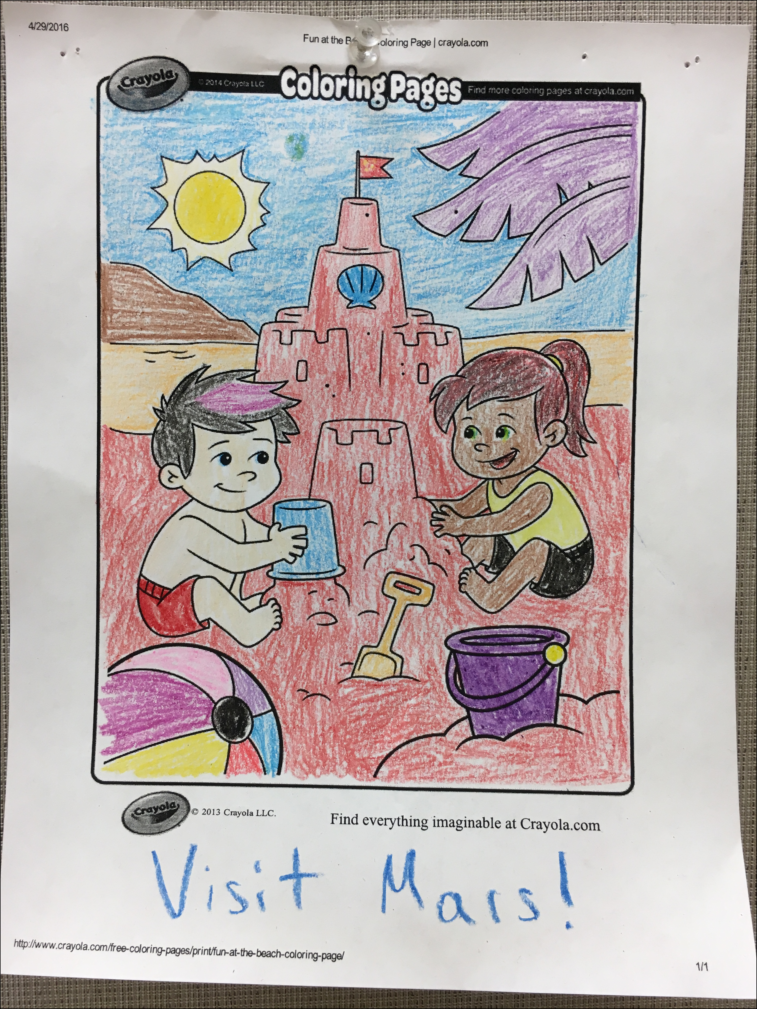

In [129]:
#=
Pixel art generator (suggested implementation: any programming language you want to master). 
Build a tool that takes an image as input and samples the image to produce pixel art as output. 
If you want to improve your front-end skills, generate the resulting pixel art using CSS.
=#

using LinearAlgebra
using SparseArrays
using Images
using TestImages
using Colors

before_photo = load("C:/Users/kgtrm/Desktop/Files/Pictures/julia_thing/IMG_0524.JPG")

In [171]:
function factors(number)
    factor_list = Int[]
    for i in 1:Int(floor(sqrt(number)))
        if (number % i == 0)
            push!(factor_list, i)
        end
    end
    return factor_list
end

scale_factors = intersect(factors(size(before_photo)[1]), factors(size(before_photo)[2]))

new_dimensions = Tuple{Float64, Float64}[]
for i in scale_factors
    push!(new_dimensions, (size(before_photo)[1] / i, size(before_photo)[2] / i))
end
;

@show scale_factors
@show new_dimensions        

scale_factors = [1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 16, 18, 21, 24, 28, 36, 42, 48]
new_dimensions = [(4032.0, 3024.0), (2016.0, 1512.0), (1344.0, 1008.0), (1008.0, 756.0), (672.0, 504.0), (576.0, 432.0), (504.0, 378.0), (448.0, 336.0), (336.0, 252.0), (288.0, 216.0), (252.0, 189.0), (224.0, 168.0), (192.0, 144.0), (168.0, 126.0), (144.0, 108.0), (112.0, 84.0), (96.0, 72.0), (84.0, 63.0)]


18-element Vector{Tuple{Float64, Float64}}:
 (4032.0, 3024.0)
 (2016.0, 1512.0)
 (1344.0, 1008.0)
 (1008.0, 756.0)
 (672.0, 504.0)
 (576.0, 432.0)
 (504.0, 378.0)
 (448.0, 336.0)
 (336.0, 252.0)
 (288.0, 216.0)
 (252.0, 189.0)
 (224.0, 168.0)
 (192.0, 144.0)
 (168.0, 126.0)
 (144.0, 108.0)
 (112.0, 84.0)
 (96.0, 72.0)
 (84.0, 63.0)

In [166]:
scale_by = 48

orig_r = size(before_photo)[1]
orig_c = size(before_photo)[2]

rows = Int(orig_r / scale_by)
columns = Int(orig_c / scale_by)

sub_dim_x = Int(floor(orig_r / rows))
sub_dim_y = Int(floor(orig_c / columns))

submatrices = Matrix{RGB{N0f8}}[]
for i in 1:rows
    for j in 1:columns
        submatrix = copy(before_photo[max(Int((i - 1) * orig_r / rows), 1) : Int((i) * orig_r / rows), max(Int((j - 1) * orig_c / columns),1) : Int((j) * orig_c / columns)])
        push!(submatrices, submatrix)
    end
end   

In [167]:
function max_dict(dictionary)
    max = 0
    current_key = 1
    for key in keys(dictionary)
        if (dictionary[key] > max)
            max = dictionary[key]
            current_key = key
        end
    end
    return current_key
end


function mode(matrix)
    item_count_dict = Dict()
    for i in matrix
        try
            item_count_dict[i] += 1
        catch
            item_count_dict[i] = 0
        end
    end
    return max_dict(item_count_dict)
end

new_submatrices = RGB{N0f8}[]
for i in 1:length(submatrices)
    push!(new_submatrices, mode(submatrices[i]))
end

length(new_submatrices)

5292

typeof(new_picture) = Matrix{RGB{N0f8}}
size(new_picture) = (84, 63)


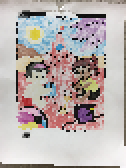

In [168]:
new_picture = copy(reshape(new_submatrices, (columns, rows))')

@show typeof(new_picture)
@show size(new_picture)
new_picture

In [169]:
orig_dim = size(before_photo)[1] / size(before_photo)[2]
new_dim = size(new_picture)[1] / size(new_picture)[2]
scale_factor = Int(size(before_photo)[1] / size(new_picture)[1])
;

@show orig_dim
@show new_dim
@show scale_factor

orig_dim = 1.3333333333333333
new_dim = 1.3333333333333333
scale_factor = 48


48

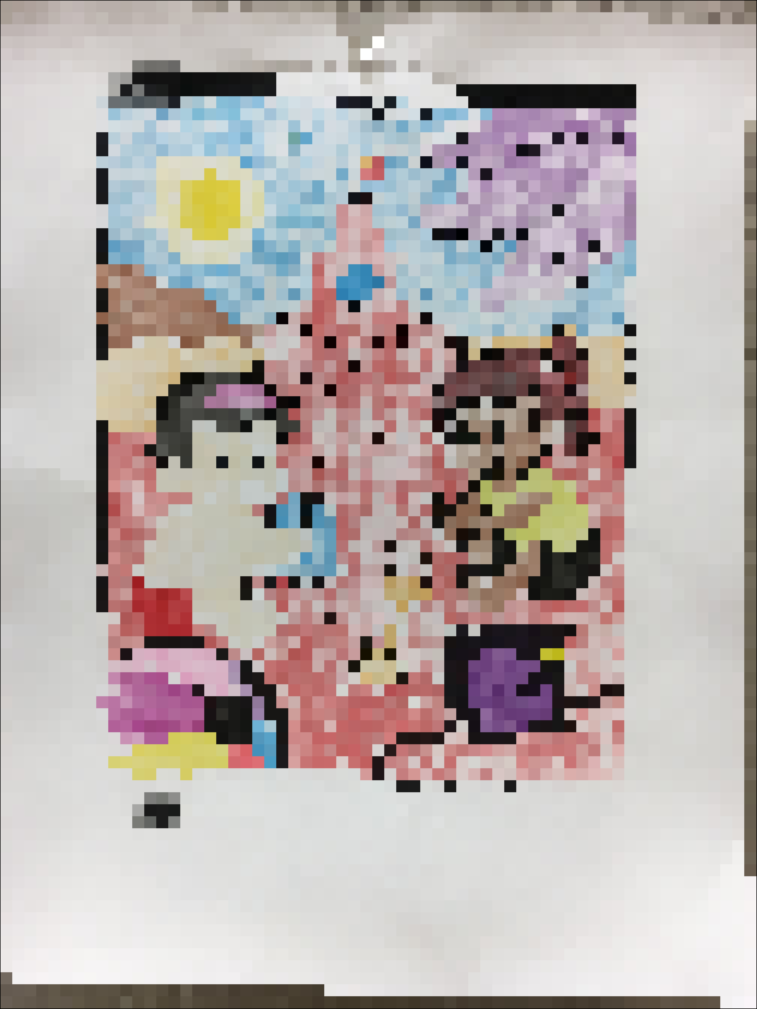

In [170]:
scaled_pixel = similar(before_photo)

for i in 1:size(new_picture)[1]
    k = max(Int((i - 1) * orig_r / rows), 1)
    for j in 1:size(new_picture)[2]
        h = max(Int((j - 1) * orig_c / columns), 1)
        pixel = new_picture[i,j]
        for k_index in k:(k + scale_factor)
            for h_index in h:(h + scale_factor)
                scaled_pixel[k_index, h_index] = new_picture[i,j]
                #[max(Int((i - 1) * orig_r / rows), 1) : Int((i) * orig_r / rows), max(Int((j - 1) * orig_c / columns),1) : Int((j) * orig_c / columns)])
            end
        end
    end
end  

scaled_pixel